<a href="https://colab.research.google.com/github/Hamza-Atiq/Internship-at-neurooceans-ai/blob/main/rag_from_langchain_day2%2C3_neurooceans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAG**

Rag is a powerful technique taht enhances LLMs by combining them with external Knowledge base

Rag has two components

1- Indexing

2- Retrieval and Generation

# Indexing

A pipeline for ingesting data from a source and indexing it

Indexing has three parts

1- Load

2- Split

3- Embedding and Store

# Loading

importing libraries

In [ ]:
! pip install -q langchain_community
#! pip install -q langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00


# 1- **CSVLoader**

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader('/content/Lending-company.csv')

data = loader.load()

print(data)

[Document(metadata={'source': '/content/Lending-company.csv', 'row': 0}, page_content='LoanID: 1\nStringID: LoanID_1\nProduct: Product B\nCustomerGender: Female\nLocation: Location 3\nRegion: Region 2\nTotalPrice: 17600\nStartDate: 04/07/2018\nDeposit: 2200\nDailyRate: 45\nTotalDaysYr: 365\nAmtPaid36: 3221\nAmtPaid60: 4166\nAmtPaid360: 14621\nLoanStatus: Active'), Document(metadata={'source': '/content/Lending-company.csv', 'row': 1}, page_content='LoanID: 2\nStringID: LoanID_2\nProduct: Product D\nCustomerGender: Female\nLocation: Location 6\nRegion: Region 6\nTotalPrice: \nStartDate: 02/01/2019\nDeposit: 2200\nDailyRate: 45\nTotalDaysYr: 365\nAmtPaid36: 3161\nAmtPaid60: 4096\nAmtPaid360: 16041\nLoanStatus: Active'), Document(metadata={'source': '/content/Lending-company.csv', 'row': 2}, page_content='LoanID: 3\nStringID: LoanID_3\nProduct: Product B\nCustomerGender: Male\nLocation: Location 8\nRegion: Region 3\nTotalPrice: 16600\nStartDate: 08/12/2016\nDeposit: 1000\nDailyRate: 45\nT

In [ ]:
print(type(data))

<class 'list'>


In [ ]:
for record in data[:2]:
  print(record)

page_content='LoanID: 1
StringID: LoanID_1
Product: Product B
CustomerGender: Female
Location: Location 3
Region: Region 2
TotalPrice: 17600
StartDate: 04/07/2018
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3221
AmtPaid60: 4166
AmtPaid360: 14621
LoanStatus: Active' metadata={'source': '/content/Lending-company.csv', 'row': 0}
page_content='LoanID: 2
StringID: LoanID_2
Product: Product D
CustomerGender: Female
Location: Location 6
Region: Region 6
TotalPrice: 
StartDate: 02/01/2019
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3161
AmtPaid60: 4096
AmtPaid360: 16041
LoanStatus: Active' metadata={'source': '/content/Lending-company.csv', 'row': 1}


In [ ]:
print(data[1])

page_content='LoanID: 2
StringID: LoanID_2
Product: Product D
CustomerGender: Female
Location: Location 6
Region: Region 6
TotalPrice: 
StartDate: 02/01/2019
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3161
AmtPaid60: 4096
AmtPaid360: 16041
LoanStatus: Active' metadata={'source': '/content/Lending-company.csv', 'row': 1}


In [ ]:
print(data[0].page_content)

LoanID: 1
StringID: LoanID_1
Product: Product B
CustomerGender: Female
Location: Location 3
Region: Region 2
TotalPrice: 17600
StartDate: 04/07/2018
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3221
AmtPaid60: 4166
AmtPaid360: 14621
LoanStatus: Active


In [ ]:
print(data[3].metadata)

{'source': '/content/Lending-company.csv', 'row': 3}


In [ ]:
print(len(data))

1043


for big file we used lazy_load instead of load

In [ ]:
for doc in loader.lazy_load():
  print(doc)

Streaming output truncated to the last 5000 lines.
TotalDaysYr: 365
AmtPaid36: 3451
AmtPaid60: 4993
AmtPaid360: 20267
LoanStatus: Finished Payment' metadata={'source': '/content/Lending-company.csv', 'row': 709}
page_content='LoanID: 711
StringID: LoanID_711
Product: Product D
CustomerGender: Female
Location: Location 63
Region: Region 10
TotalPrice: 20950
StartDate: 26/10/2017
Deposit: 2200
DailyRate: 55
TotalDaysYr: 365
AmtPaid36: 4151
AmtPaid60: 5343
AmtPaid360: 20267
LoanStatus: Finished Payment' metadata={'source': '/content/Lending-company.csv', 'row': 710}
page_content='LoanID: 712
StringID: LoanID_712
Product: Product B
CustomerGender: Male
Location: Location 39
Region: Region 5
TotalPrice: 17300
StartDate: 25/05/2018
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3891
AmtPaid60: 5433
AmtPaid360: 16617
LoanStatus: Finished Payment' metadata={'source': '/content/Lending-company.csv', 'row': 711}
page_content='LoanID: 713
StringID: LoanID_713
Product: Product A
CustomerG

# Specify a column to identify the document source

In [ ]:
loader = CSVLoader(file_path='/content/Lending-company.csv', source_column='LoanID')

data = loader.load()

for record in data[:2]:
  print(record)

page_content='LoanID: 1
StringID: LoanID_1
Product: Product B
CustomerGender: Female
Location: Location 3
Region: Region 2
TotalPrice: 17600
StartDate: 04/07/2018
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3221
AmtPaid60: 4166
AmtPaid360: 14621
LoanStatus: Active' metadata={'source': '1', 'row': 0}
page_content='LoanID: 2
StringID: LoanID_2
Product: Product D
CustomerGender: Female
Location: Location 6
Region: Region 6
TotalPrice: 
StartDate: 02/01/2019
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3161
AmtPaid60: 4096
AmtPaid360: 16041
LoanStatus: Active' metadata={'source': '2', 'row': 1}


In [ ]:
loader = CSVLoader(file_path='/content/Lending-company.csv', source_column='DailyRate')

data = loader.load()

for record in data[:2]:
  print(record)

page_content='LoanID: 1
StringID: LoanID_1
Product: Product B
CustomerGender: Female
Location: Location 3
Region: Region 2
TotalPrice: 17600
StartDate: 04/07/2018
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3221
AmtPaid60: 4166
AmtPaid360: 14621
LoanStatus: Active' metadata={'source': '45', 'row': 0}
page_content='LoanID: 2
StringID: LoanID_2
Product: Product D
CustomerGender: Female
Location: Location 6
Region: Region 6
TotalPrice: 
StartDate: 02/01/2019
Deposit: 2200
DailyRate: 45
TotalDaysYr: 365
AmtPaid36: 3161
AmtPaid60: 4096
AmtPaid360: 16041
LoanStatus: Active' metadata={'source': '45', 'row': 1}


# Customizing the CSV parsing and loading

In [ ]:
loader = CSVLoader(
    '/content/Lending-company.csv',
    csv_args = {
        'delimiter' : ',',             # specifies that the file uses commas to separate fields
        'quotechar' : '"',             # Specifies that quoted text in the file uses double quotes

        # Manually defines the names of the fields (columns) in the CSV file.
        # Useful if the CSV file does not have a header row or if you want to override the headers.
        'fieldnames' : ['Loan_ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt']
    },
)

data = loader.load()
for record in data[:2]:
  print(record)

page_content='Loan_ID: LoanID
Amount_Requested: StringID
Amount_Funded_By_Investors: Product
Interest_Rate: CustomerGender
Loan_Length: Location
Loan_Purpose: Region
Debt: TotalPrice
None: StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus' metadata={'source': '/content/Lending-company.csv', 'row': 0}
page_content='Loan_ID: 1
Amount_Requested: LoanID_1
Amount_Funded_By_Investors: Product B
Interest_Rate: Female
Loan_Length: Location 3
Loan_Purpose: Region 2
Debt: 17600
None: 04/07/2018,2200,45,365,3221,4166,14621,Active' metadata={'source': '/content/Lending-company.csv', 'row': 1}


# 2- **PDF Loader**

For simple string representation of a text, which not included any type of image that is embedded in a PDF, the method below is appropriate.

It will return a list of Document objects, one document per page, containing a single string of the page's text in the Document's page_content attribute.

It will not parse text in images or scanned PDF pages. Under the hood it uses the pypdf Python library.

installing libraries

In [ ]:
%pip install -q pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('/content/National AI Policy Consultation Draft V1.pdf')

pages = [page async for page in loader.alazy_load()]

In [ ]:
print(len(pages))

41


In [ ]:
print(type(pages))

<class 'list'>


In [ ]:
print(pages[0].page_content)

 
 
i
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
                        Draft
National
 
Artificial Intelligence Policy
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Government of Pakistan
Ministry of Information Technology & Telecommunication
https://moitt.gov.pk
 
 
 



In [ ]:
print(pages[0].metadata)

{'source': '/content/National AI Policy Consultation Draft V1.pdf', 'page': 0}


In [ ]:
texts = [page.page_content for page in pages]
metadatas = [{'page' : i for i , page in enumerate(pages)}]

In [ ]:
print(texts)

[' \n \ni\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n                        Draft\nNational\n \nArtificial Intelligence Policy\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGovernment of Pakistan\nMinistry of Information Technology & Telecommunication\nhttps://moitt.gov.pk\n \n \n \n', ' \n \nii \n \nAcknowledgments \nThe Government of Pakistan, Ministry of IT & Telecom , pays its gratitude to all the officials  and consultants, \nparticularly RSM Pakistan and GlowBug Technologies (Pvt.) Ltd. , facilitators, developers, and stakeholders who \nrigorously and relentlessly participated in the revi ew, drafting, harmonizing, and ratification of the National \nArtificial Intelligence Policy – 2022, helping the Ministry with an all -inclusive user -centric, evidence -based, \nforward-looking, and agile policy framework for enabling Pakistan towards a digital economy and society. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n

In [ ]:
print(metadatas)

[{'page': 40}]


In [ ]:
for text in texts:
  print(text ,'\n' , '*'*100 , '\n')

 
 
i
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
                        Draft
National
 
Artificial Intelligence Policy
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Government of Pakistan
Ministry of Information Technology & Telecommunication
https://moitt.gov.pk
 
 
 
 
 **************************************************************************************************** 

 
 
ii 
 
Acknowledgments 
The Government of Pakistan, Ministry of IT & Telecom , pays its gratitude to all the officials  and consultants, 
particularly RSM Pakistan and GlowBug Technologies (Pvt.) Ltd. , facilitators, developers, and stakeholders who 
rigorously and relentlessly participated in the revi ew, drafting, harmonizing, and ratification of the National 
Artificial Intelligence Policy – 2022, helping the Ministry with an all -inclusive user -centric, evidence -based, 
forward-looking, and agile policy framework for enabling Pakistan towards a digital economy and society. 
 
 
 
 
 
 
 
 
 
 
 
 
 

# Vector search over pdf

importing libraries

In [ ]:
import google.generativeai as genai

from google.colab import userdata

from langchain_core.embeddings import Embeddings
from langchain_core.vectorstores import InMemoryVectorStore


In [ ]:
class GeminiEmbeddings(Embeddings):

    def __init__(self, api_key):
        genai.configure(api_key=api_key)
        self.model = 'models/text-embedding-004'

    def embed_documents(self, texts):
        embeddings = []
        for text in texts:
            result = genai.embed_content(
                model=self.model,
                content=text
            )
            embeddings.append(result['embedding'])
        return embeddings

    def embed_query(self, query):
        result = genai.embed_content(
            model=self.model,
            content=query
        )
        return result['embedding']

# Create the embedding object
embedding = GeminiEmbeddings(userdata.get('gemini'))

# Create the vector store
vector_store = InMemoryVectorStore.from_documents(
    pages,
    embedding=embedding
)

# Perform similarity search'
query = "How this policy help students"

docs = vector_store.similarity_search(query, k=3)
for doc in docs:
    print(f'Page {doc.metadata["page"]} : {doc.page_content[:300]} \n')

Page 24 :  
 
 
10 
 
b.  The curriculum shall be organized in consultation with the Establishment Division for inclusion in 
the coursework of the public servants and implementation at different levels. 
c. 100% of public servants shall gain awareness and knowledge on personal data protection and AI 
by 2025 

Page 23 :  
 
 
9 
 
a. The Ministry of IT & Telecom , through CoE-AI, shall organize a “ National High-Tech Internship 
Placement Program” for offering stipend based 3 to 6 months internships in collaboration with the 
private sector locally and internationally.  
b. The internship program shall be organized 

Page 5 :  
 
 
6 
 
1 Executive Summary 
Pakistan has a unique opportunity to harness digital disruption by educating an eager young population 
that can potentially propel the n ation onto a growth trajectory to sustain our future national 
competitiveness and improve the lives of citizens. Artificial Intel 



# Layout analysis and extraction of text from images

installing libraries

In [ ]:
%pip install -qU langchain-unstructured
!pip install -q "unstructured[pdf]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.4 MB/s eta 0:00:00

In [ ]:
from langchain_unstructured import UnstructuredLoader

In [ ]:
loader = UnstructuredLoader(
    '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf',
    strategy='fast',
    coordinates = True,
)

# Load documents
docs = list(loader.lazy_load())

In [ ]:
print(len(docs))              # 11 pages data divided into 254 pages

254


In [ ]:
# first page document

first_page_docs = [doc for doc in docs if doc.metadata.get('page_number') == 1]

for dic in first_page_docs:
  print(dic.metadata)

{'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((211.488, 99.42961860000003), (211.488, 116.64501860000007), (399.89333760000005, 116.64501860000007), (399.89333760000005, 99.42961860000003)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'languages': ['eng'], 'last_modified': '2024-12-10T05:54:34', 'page_number': 1, 'filetype': 'application/pdf', 'category': 'Title', 'element_id': '8acfe2caf2b771529ce32c70bcf67561'}
{'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((116.68099999999998, 184.46211719999997), (116.68099999999998, 217.72869719999994), (216.03900606, 217.72869719999994), (216.03900606, 184.46211719999997)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'langu

# Ectracting tables and other structures

Each Document we load represents a structure, like a title, paragraph, or table.

installing libraries

In [ ]:
%pip install -qU matplotlib PyMuPDF pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 76.6 MB/s eta 0:00:00


In [ ]:
# fitz is a module in the PyMuPDF library, which is widely used for working with PDF documents and other document types.
# It allows you to open, read, edit, and analyze PDFs and extract content like text and images.
import fitz

# patches is a module in the matplotlib library used to draw geometric shapes (like rectangles, circles, polygons) on plots.
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def plot_pdf_with_boxes(pdf_page , segments):

     # Convert PDF page to image
    pix = pdf_page.get_pixmap()                     # Uses get_pixmap from PyMuPDF to render the PDF page as a bitmap.
    pil_image = Image.frombytes(                    # Converts the bitmap into a PIL image using Image.frombytes
        'RGB',
        [pix.width , pix.height],
        pix.samples
    )

    # Create plot
    fig , ax = plt.subplots(1 , figsize = (10 , 10))
    ax.imshow(pil_image)                            # Displays the PDF page as an image on the plot.
    categories = set()

    # Define color mapping
    category_to_color = {
        'Title' : "orchid",
        'Image' : 'forestgreen',
        'Table' : 'tomato',
        'NarrativeText': 'deepskyblue',
        'Header': 'orange'
    }

    # Plot segments
    for segment in segments:

        if 'coordinates' not in segment or 'points' not in segment['coordinates']:
            continue

        # Extracts the segment’s coordinates and scales them to match the image size.
        points = segment['coordinates']['points']
        layout_width = segment['coordinates']['layout_width']
        layout_height = segment['coordinates']['layout_height']

        # Scale points
        scaled_points = [
            (x * pix.width / layout_width , y * pix.height / layout_height)
            for x , y in points
        ]

        # Choose color
        box_color = category_to_color.get(segment['category'] , 'deepskyblue')
        categories.add(segment['category'])

        # Create polygon
        rectangle = patches.Polygon(
            scaled_points,
            linewidth = 2,
            edgecolor = box_color,
            facecolor = 'none'
        )
        ax.add_patch(rectangle)

    # Create legend
    legend_handles = []

    for category in category_to_color.keys():
        if category in categories:
            legend_handles.append(
                patches.Patch(
                    color=category_to_color[category],
                    label=category
                )
            )

    ax.axis('off')
    ax.legend(
        handles = legend_handles,
        loc = 'center left',
        bbox_to_anchor = (1 , 0.5)
    )
    plt.tight_layout()
    plt.show()

def render_page(doc_list : list , page_number : int , print_text = True) -> None:

    pdf_page = fitz.open('/content/NIPS-2017-attention-is-all-you-need-Paper.pdf').load_page(page_number - 1)

    # Filter documents for the specified page
    page_docs = [
        doc for doc in doc_list if doc.metadata.get('page_number') == page_number
    ]

    # Extract segments
    segments = [doc.metadata for doc in page_docs]   # Extracts the metadata (e.g., category, coordinates) for plotting.

    # Plot PDF with boxes
    plot_pdf_with_boxes(pdf_page , segments)

    # Print text if requested
    if print_text:
        for doc in page_docs:
            print(f"Category: {doc.metadata.get('category')}")
            print(doc.page_content, '\n')
            print('-' * 50)


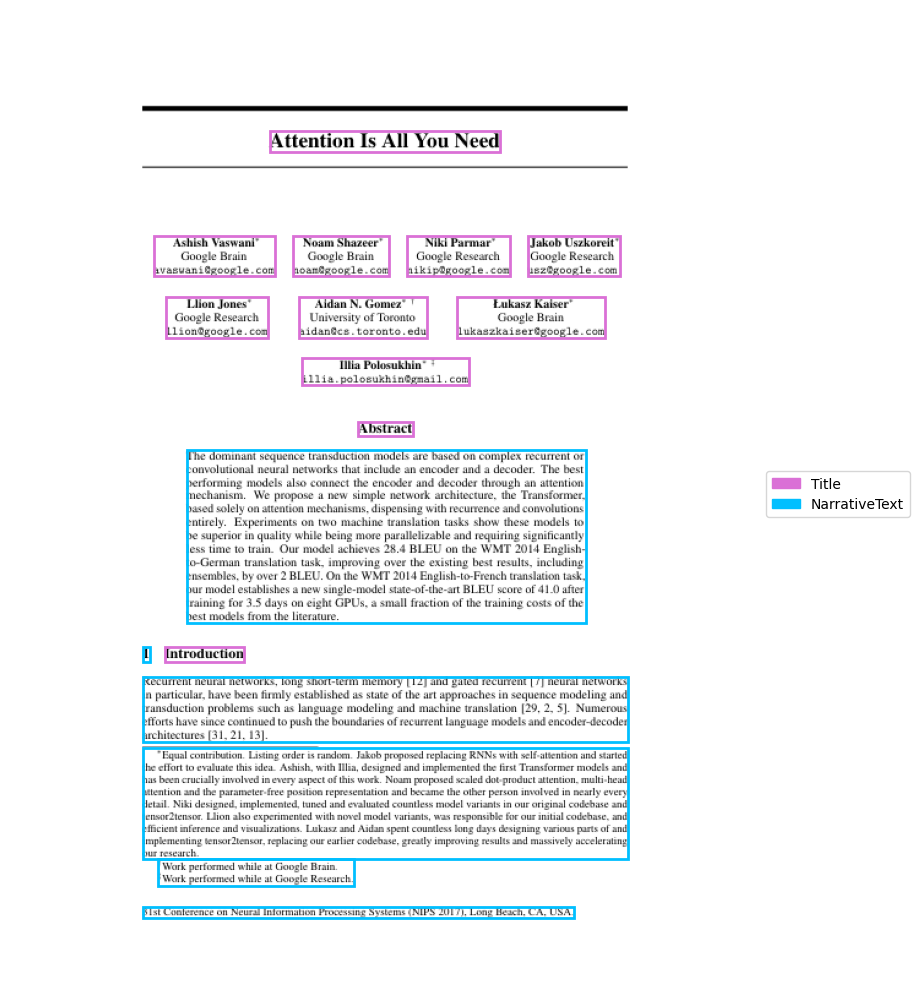

Category: Title
Attention Is All You Need 

--------------------------------------------------
Category: Title
Ashish Vaswani∗ Google Brain avaswani@google.com 

--------------------------------------------------
Category: Title
Noam Shazeer∗ Google Brain noam@google.com 

--------------------------------------------------
Category: Title
Niki Parmar∗ Google Research nikip@google.com 

--------------------------------------------------
Category: Title
Jakob Uszkoreit∗ Google Research usz@google.com 

--------------------------------------------------
Category: Title
Llion Jones∗ Google Research llion@google.com 

--------------------------------------------------
Category: Title
Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu 

--------------------------------------------------
Category: Title
Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com 

--------------------------------------------------
Category: Title
Illia Polosukhin∗ ‡ illia.polosukhin@gmail.com 

------------

In [ ]:
render_page(docs , 1)

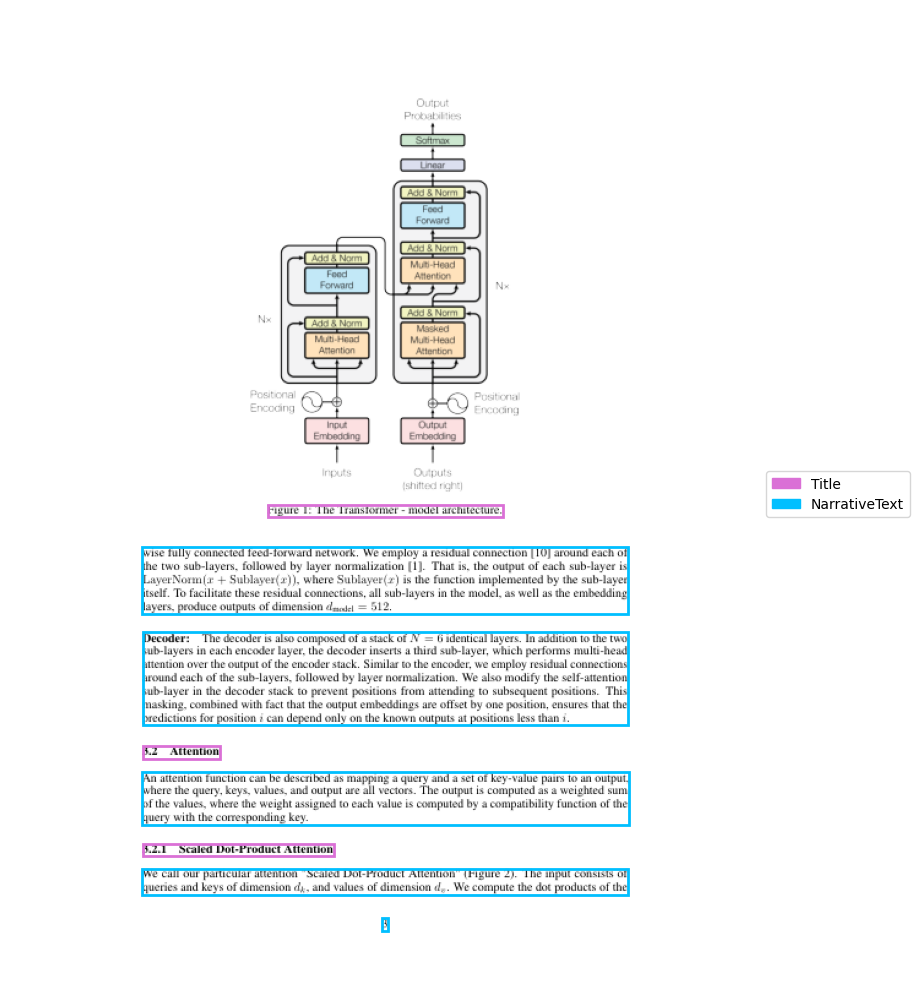

Category: Title
Figure 1: The Transformer - model architecture. 

--------------------------------------------------
Category: NarrativeText
wise fully connected feed-forward network. We employ a residual connection [10] around each of the two sub-layers, followed by layer normalization [1]. That is, the output of each sub-layer is LayerNorm(x + Sublayer(x)), where Sublayer(x) is the function implemented by the sub-layer itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding layers, produce outputs of dimension dmodel = 512. 

--------------------------------------------------
Category: NarrativeText
Decoder: The decoder is also composed of a stack of N = 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by

In [ ]:
render_page(docs , 3)

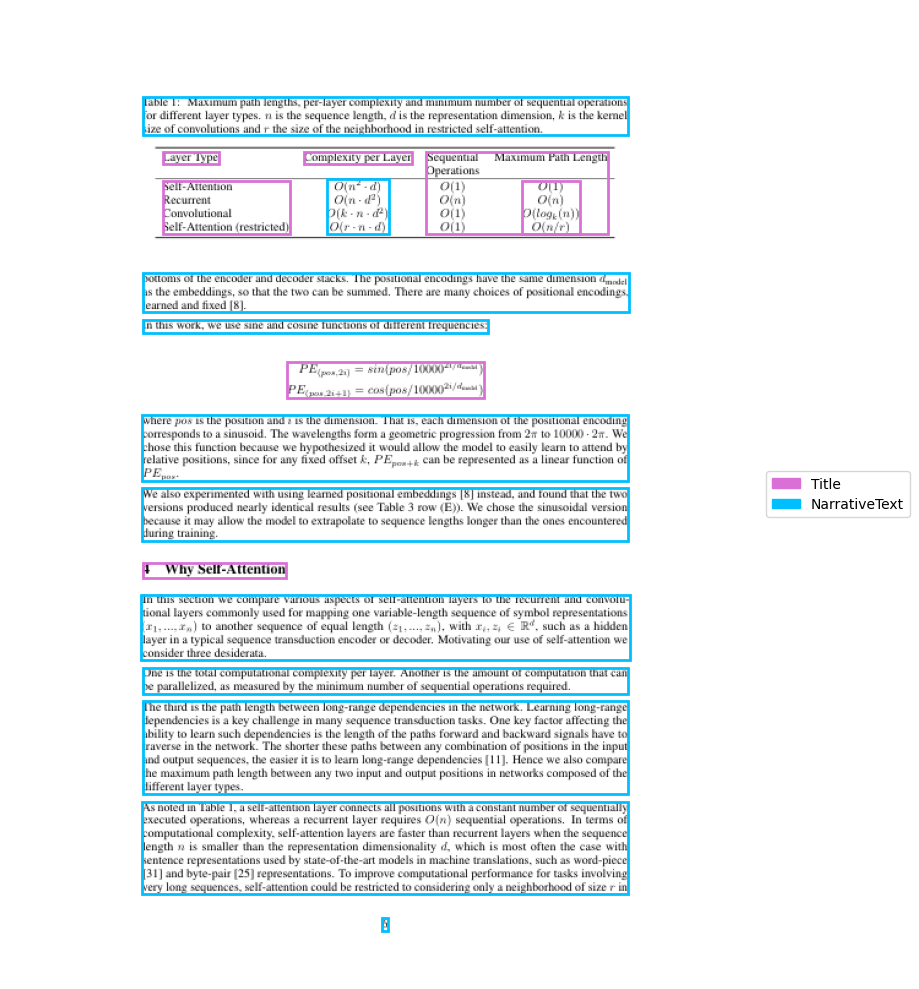

Category: NarrativeText
Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. n is the sequence length, d is the representation dimension, k is the kernel size of convolutions and r the size of the neighborhood in restricted self-attention. 

--------------------------------------------------
Category: Title
Layer Type 

--------------------------------------------------
Category: Title
Self-Attention Recurrent Convolutional Self-Attention (restricted) 

--------------------------------------------------
Category: Title
Complexity per Layer 

--------------------------------------------------
Category: UncategorizedText
O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) 

--------------------------------------------------
Category: Title
Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) 

--------------------------------------------------
Category: Title
O(1) O(n) O(logk(n)) O(n/r) 

--------------------------

In [ ]:
render_page(docs , 6)

Note that although the table text is collapsed into a single string in the document's content, the metadata contains a representation of its rows and columns:

In [ ]:
from IPython.display import HTML, display

def extract_tables(doc_list, page_number):

    # Extract table-related documents
    table_docs = [
        doc for doc in doc_list
        if (doc.metadata.get('page_number') == page_number and
            ('Table' in doc.page_content or
             'table' in doc.page_content or
             any('table' in str(link).lower() for link in doc.metadata.get('links', []))))
    ]

    # Print table details
    print(f"Tables found on page {page_number}:")
    for doc in table_docs:
        print("\nTable Content:")
        print(doc.page_content)
        print("\nTable Metadata:")
        print(doc.metadata)

        # Try to display HTML if available
        if 'text_as_html' in doc.metadata:
            display(HTML(doc.metadata['text_as_html']))
        print('-' * 50)

    return table_docs

In [ ]:
extract_tables(docs , 6)

Tables found on page 6:

Table Content:
Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. n is the sequence length, d is the representation dimension, k is the kernel size of convolutions and r the size of the neighborhood in restricted self-attention.

Table Metadata:
{'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((107.691, 70.94432159999997), (107.691, 102.72492160000002), (504.003525788, 102.72492160000002), (504.003525788, 70.94432159999997)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'languages': ['eng'], 'last_modified': '2024-12-10T05:54:34', 'page_number': 6, 'filetype': 'application/pdf', 'category': 'NarrativeText', 'element_id': '47f2a891d199858de8ce87b6d0c25e85'}
--------------------------------------------------

Table Content:
We also ex

[Document(metadata={'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((107.691, 70.94432159999997), (107.691, 102.72492160000002), (504.003525788, 102.72492160000002), (504.003525788, 70.94432159999997)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'languages': ['eng'], 'last_modified': '2024-12-10T05:54:34', 'page_number': 6, 'filetype': 'application/pdf', 'category': 'NarrativeText', 'element_id': '47f2a891d199858de8ce87b6d0c25e85'}, page_content='Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. n is the sequence length, d is the representation dimension, k is the kernel size of convolutions and r the size of the neighborhood in restricted self-attention.'),
 Document(metadata={'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordina

# Extracting Text from specific sections


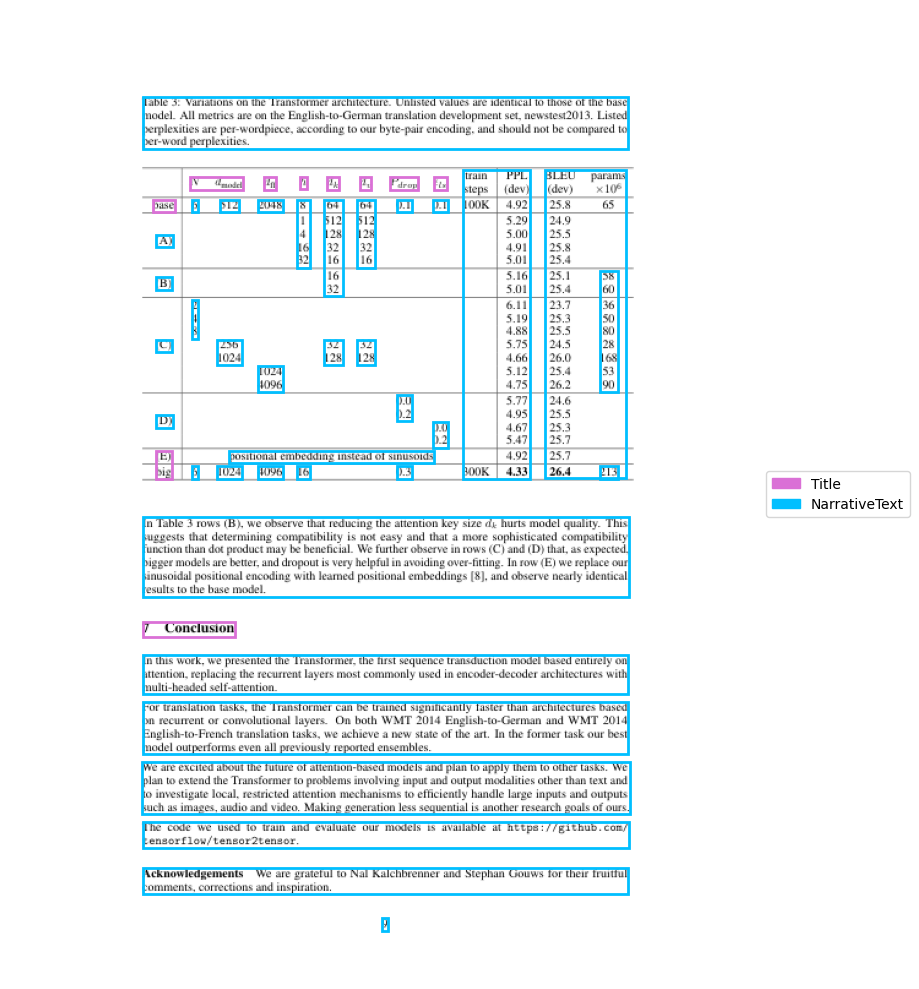

Category: NarrativeText
Table 3: Variations on the Transformer architecture. Unlisted values are identical to those of the base model. All metrics are on the English-to-German translation development set, newstest2013. Listed perplexities are per-wordpiece, according to our byte-pair encoding, and should not be compared to per-word perplexities. 

--------------------------------------------------
Category: Title
base 

--------------------------------------------------
Category: UncategorizedText
(A) 

--------------------------------------------------
Category: UncategorizedText
(B) 

--------------------------------------------------
Category: UncategorizedText
(C) 

--------------------------------------------------
Category: UncategorizedText
(D) 

--------------------------------------------------
Category: Title
N dmodel 

--------------------------------------------------
Category: UncategorizedText
6 

--------------------------------------------------
Category: UncategorizedT

In [ ]:
render_page(docs, 9)

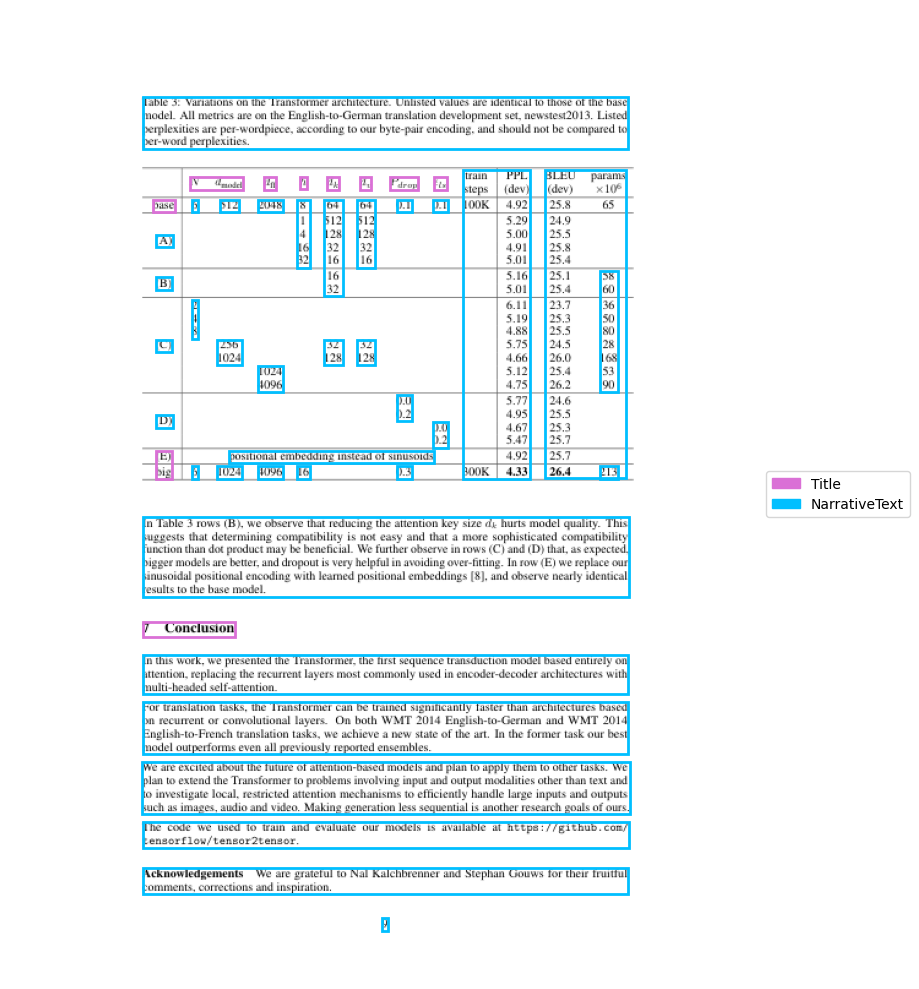

In [ ]:
render_page(docs, 9, print_text=False)

In [ ]:
# ninth page document

ninth_page_docs = [doc for doc in docs if doc.metadata.get('page_number') == 9]

for dic in ninth_page_docs:
  print(dic.metadata)

{'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((107.691, 70.94432159999997), (107.691, 113.63392160000001), (504.00338739999984, 113.63392160000001), (504.00338739999984, 70.94432159999997)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'languages': ['eng'], 'last_modified': '2024-12-10T05:54:34', 'page_number': 9, 'filetype': 'application/pdf', 'category': 'NarrativeText', 'element_id': '2c88bbb0cc66ec39caecb89a01438fe2'}
{'source': '/content/NIPS-2017-attention-is-all-you-need-Paper.pdf', 'coordinates': {'points': ((116.468, 155.24732159999996), (116.468, 165.20992160000003), (134.1715402, 165.20992160000003), (134.1715402, 155.24732159999996)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'NIPS-2017-attention-is-all-you-need-Paper.pdf', 'languages': ['eng'], 

In [ ]:
conclusion_docs = []
parent_id = -1

for doc in docs:

    if doc.metadata['category'] == 'Title' and 'Conclusion' in doc.page_content:
        parent_id = doc.metadata['element_id']

    if doc.metadata.get('parent_id') == parent_id:
        conclusion_docs.append(doc)

for doc in conclusion_docs:
    print(doc.page_content)
    print('-' * 50)

In this work, we presented the Transformer, the ﬁrst sequence transduction model based entirely on attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention.
--------------------------------------------------
For translation tasks, the Transformer can be trained signiﬁcantly faster than architectures based on recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art. In the former task our best model outperforms even all previously reported ensembles.
--------------------------------------------------
We are excited about the future of attention-based models and plan to apply them to other tasks. We plan to extend the Transformer to problems involving input and output modalities other than text and to investigate local, restricted attention mechanisms to efﬁciently handle large inputs and outputs such as images, audio and v

# Extracting text from images

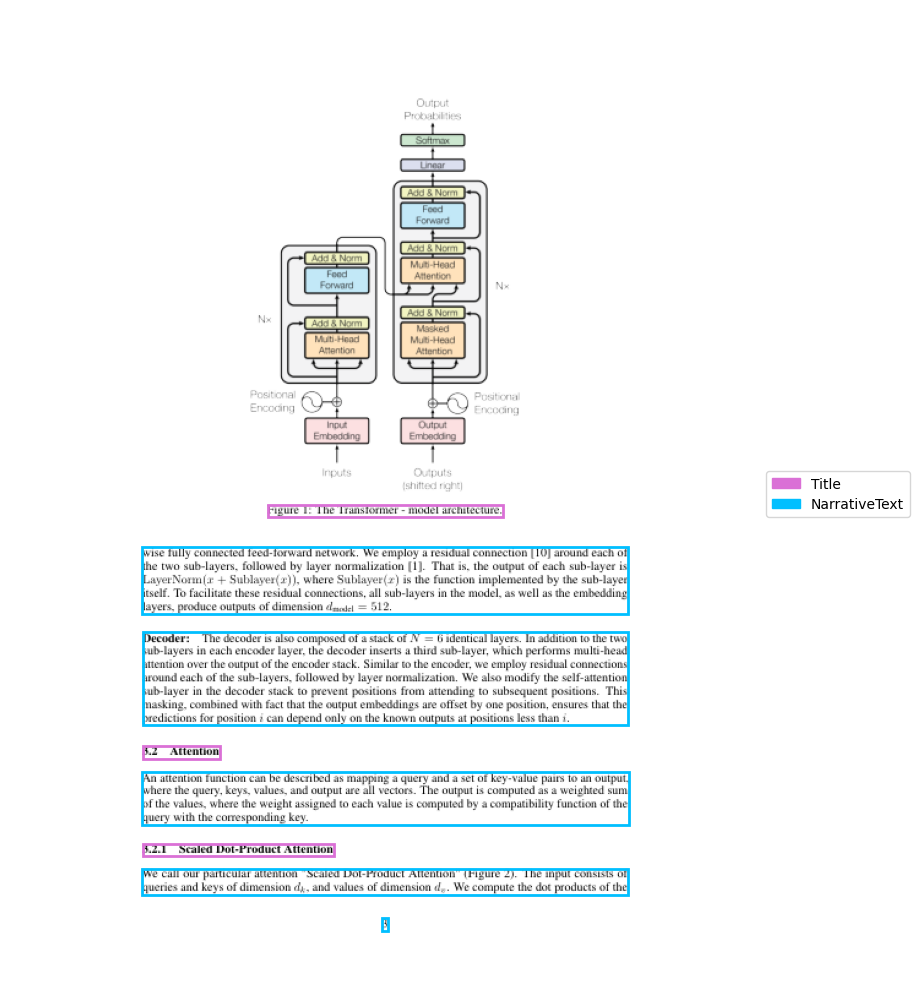

In [ ]:
render_page(docs, 3 , print_text=False)

# Use of Multimodal models

installing libraries

In [ ]:
! pip install -qU langchain-mistralai

In [ ]:
from langchain_mistralai import ChatMistralAI
from google.colab import userdata

model = ChatMistralAI(model = 'pixtral-12b-2409' , api_key = userdata.get('mistral'))

In [ ]:
import base64
import io
import fitz
from PIL import Image

In [ ]:
def pdf_page_to_base64(pdf_path : str, page_number : int) -> str:

    pdf_document = fitz.open(pdf_path)
    pdf_page = pdf_document.load_page(page_number - 1)
    pix = pdf_page.get_pixmap()
    image = Image.frombytes(
        'RGB',
        [pix.width , pix.height],
        pix.samples
    )

    buffer = io.BytesIO()
    image.save(buffer , format = 'PNG')
    image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')

    pdf_document.close()

    return image_base64


In [ ]:
from IPython.display import Image as IPImage
from IPython.display import display

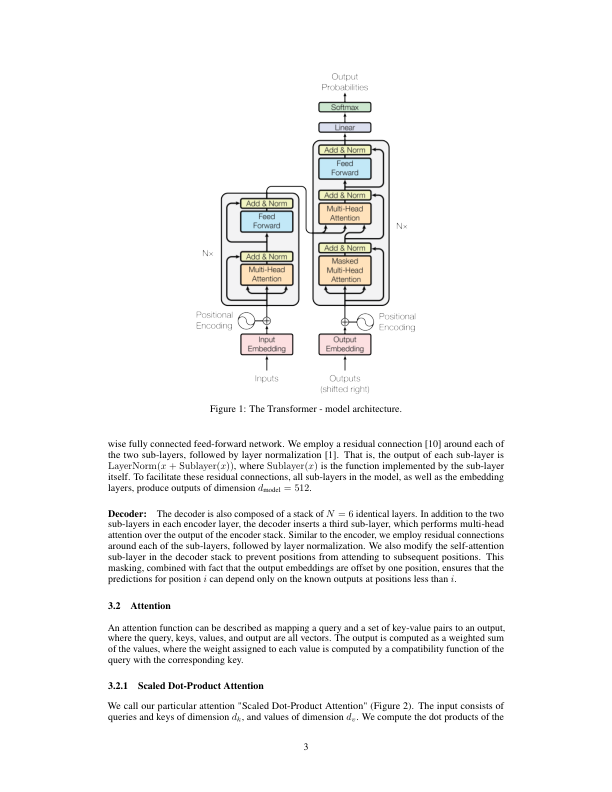

In [ ]:
base64_image = pdf_page_to_base64('/content/NIPS-2017-attention-is-all-you-need-Paper.pdf' , 3)
display(IPImage(data = base64.b64decode(base64_image)))

In [ ]:
from langchain_core.messages import HumanMessage

In [ ]:
query = "What is the name of the sixth step in the pipeline?"

message = HumanMessage(
    content = [
        {'type' : 'text' , "text" : query},
        {'type' : 'image_url' , 'image_url' : {'url' : f"data:image/png;base64,{base64_image}"},},
    ],
)

response = model.invoke([message])
print(response.content)

Sure, let's break it down step by step:

1. Identify the pipeline steps mentioned in the context.
2. List each step as it appears:
   - First step: Input Embedding
   - Second step: Positional Encoding
   - Third step: Input Feeding
   - Fourth step: Encoder Stack
   - Fifth step: Decoder Stack
   - Sixth step: Linear + Softmax
   - Seventh step: Output

Based on this list, the sixth step in the pipeline is 'Linear + Softmax'.

So, the name of the sixth step is **Linear + Softmax**.


# 3- **Web pages loader**

# Simple and fast text extraction

**Simple and fast** parsing, in which we recover one Document per web page with its content represented as a "flattened" string

installing libraries

In [ ]:
%pip install -qU langchain-community beautifulsoup4

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

loader = WebBaseLoader(web_path=[page_url])

docs = [doc async for doc in loader.alazy_load()]

assert len(docs) == 1

doc = docs[0]

print(doc)

page_content='




How to add memory to chatbots | ü¶úÔ∏èüîó LangChain






Skip to main contentIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableHow to add retrieval to chatbots

In [ ]:
print(f"{doc.metadata}\n")
print(doc.page_content[:500].strip())

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/', 'title': 'How to add memory to chatbots | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain', 'description': 'A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:', 'language': 'en'}

How to add memory to chatbots | ü¶úÔ∏èüîó LangChain






Skip to main contentIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild


In [ ]:
loader = WebBaseLoader(web_path=[page_url],
                       bs_kwargs={
                           "parse_only": bs4.SoupStrainer(class_='theme-doc-markdown markdown')
                           },
                       bs_get_text_kwargs={
                           "separator" : ' | ', 'strip' : True
                       })

docs = [doc async for doc in loader.alazy_load()]

assert len(docs) == 1

doc = docs[0]

print(doc)

page_content='How to add memory to chatbots | A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including: | Simply stuffing previous messages into a chat model prompt. | The above, but trimming old messages to reduce the amount of distracting information the model has to deal with. | More complex modifications like synthesizing summaries for long running conversations. | We'll go into more detail on a few techniques below! | note | This how-to guide previously built a chatbot using | RunnableWithMessageHistory | . You can access this version of the guide in the | v0.2 docs | . | As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of | LangGraph persistence | to incorporate | memory | into new LangChain applications. | If your code is already relying on | RunnableWithMessageHistory | or | BaseChatMessageHistory | , you do | not | need to make any chan

In [ ]:
print(f"{doc.metadata}\n")
print(doc.page_content[:500])

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/'}

How to add memory to chatbots | A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including: | Simply stuffing previous messages into a chat model prompt. | The above, but trimming old messages to reduce the amount of distracting information the model has to deal with. | More complex modifications like synthesizing summaries for long running conversations. | We'll go into more detail on a few t


**Advanced parsing**, in which we recover multiple Document objects per page, allowing one to identify and traverse sections, links, tables, and other structures.

In [ ]:
%pip install -qU langchain-unstructured

In [ ]:
from langchain_unstructured import UnstructuredLoader

page_url = 'https://python.langchain.com/docs/how_to/chatbots_memory/'
loader = UnstructuredLoader(web_url= page_url)

docs = []
async for doc in loader.alazy_load():
    docs.append(doc)


In [ ]:
for doc in docs[:5]:
  print(doc.page_content)

How to add memory to chatbots
A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:
Simply stuffing previous messages into a chat model prompt.
The above, but trimming old messages to reduce the amount of distracting information the model has to deal with.
More complex modifications like synthesizing summaries for long running conversations.


In [ ]:
for doc in docs[:5]:
    print(f'{doc.metadata["category"]}: {doc.page_content}')

Title: How to add memory to chatbots
NarrativeText: A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:
ListItem: Simply stuffing previous messages into a chat model prompt.
ListItem: The above, but trimming old messages to reduce the amount of distracting information the model has to deal with.
ListItem: More complex modifications like synthesizing summaries for long running conversations.
